# Intention:
### Deploy a torch nn module to output a 500 point Gaussian dataset from a 1-dim input from within the neural network entirely.

### Instead of Preprogramming a Gaussian dataset using the random method, the neural network will be trained as a regression model and the output of 500 datapoints are plotted alongside the distribution function graph as a way to compare the two models.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#Hardcoding in a few values such as standard deviation and mean/average

In [67]:
SD = 0.3

In [68]:
Denom = SD**2*2
A = 1/np.sqrt(2*np.pi*SD)
print(Denom, A)

0.18 0.7283656203947194


In [69]:
torch.manual_seed(1)   
x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)  # x data (tensor), shape=(500, 1)
z = x - 0.3
#Here is the Gaussian distribution defined!
y =  A*torch.exp(-z.pow(2)/Denom, out=None)  

y_rand_noise = y + 0.1*torch.rand(x.size())
# noisy y data (tensor), shape=(500, 1)

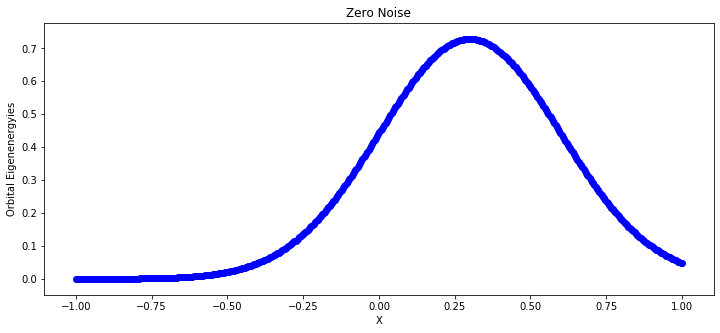

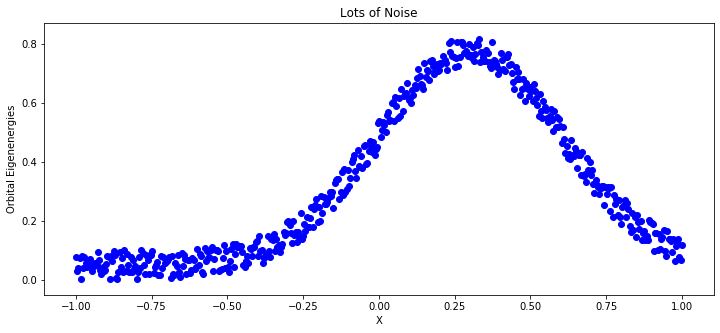

In [70]:
#Set variables 
from torch.autograd import Variable
x =Variable(x)
y = Variable(y)

plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Zero Noise')
plt.xlabel('X')
plt.ylabel('Orbital Eigenenergyies')

x, y_rand_noise = Variable(x), Variable(y_rand_noise)
plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y_rand_noise.data.numpy(), color = "blue")
plt.title('Lots of Noise')
plt.xlabel('X')
plt.ylabel('Orbital Eigenenergies')


plt.show()

### The zero-noise instance of the data 

### Here we're going to train it on a Gaussian distribution that has no noise, and every datapoint is given by y(x) like the first graph above

In [71]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.predict = torch.nn.Linear(n_hidden, n_output)   

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x

In [72]:
EPOCHS = 1000

In [73]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

#We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  activation function for hidden layer

arr_loss = []
#fig, ax = plt.subplots(figsize=(12,7))

In [74]:
#Defining MAE mathematically so we can read a printout of it later
#There may be a torch attribute we can use to define this later 
def MAE(y,y_hat,epoch):
    res = 0
    for i in range(len(y)):
        res += abs(y[i] - y_hat[i])
    return res/len(y)

In [75]:
# train the network
#This array is used to tally the loss function values over time for plotting purposes.
arr_loss = []
for i in range(1,EPOCHS+1):
  
    prediction = net(x)      

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()    
    loss.backward()          
    optimizer.step()        
    arr_loss.append(loss.data.numpy())
    
    
    print('Epoch: ', i, 'Loss = %.4f' % loss.data.numpy(),
         'MAE: ', MAE(y.data,prediction.data,i).numpy())
          #,'MAE: ', MAE(y.data,prediction.data,i))    

Epoch:  1 Loss = 0.2504 MAE:  [0.46053362]
Epoch:  2 Loss = 0.0526 MAE:  [0.17406651]
Epoch:  3 Loss = 0.0460 MAE:  [0.18178375]
Epoch:  4 Loss = 0.0443 MAE:  [0.18104976]
Epoch:  5 Loss = 0.0428 MAE:  [0.17825179]
Epoch:  6 Loss = 0.0415 MAE:  [0.1751818]
Epoch:  7 Loss = 0.0404 MAE:  [0.17220256]
Epoch:  8 Loss = 0.0393 MAE:  [0.1693757]
Epoch:  9 Loss = 0.0384 MAE:  [0.16670921]
Epoch:  10 Loss = 0.0375 MAE:  [0.16419394]
Epoch:  11 Loss = 0.0367 MAE:  [0.16181661]
Epoch:  12 Loss = 0.0360 MAE:  [0.15957303]
Epoch:  13 Loss = 0.0354 MAE:  [0.15751106]
Epoch:  14 Loss = 0.0348 MAE:  [0.15570812]
Epoch:  15 Loss = 0.0343 MAE:  [0.15412287]
Epoch:  16 Loss = 0.0338 MAE:  [0.152721]
Epoch:  17 Loss = 0.0334 MAE:  [0.1514683]
Epoch:  18 Loss = 0.0330 MAE:  [0.15035081]
Epoch:  19 Loss = 0.0326 MAE:  [0.14934614]
Epoch:  20 Loss = 0.0323 MAE:  [0.14844026]
Epoch:  21 Loss = 0.0320 MAE:  [0.14761335]
Epoch:  22 Loss = 0.0317 MAE:  [0.14686027]
Epoch:  23 Loss = 0.0314 MAE:  [0.14616516]
Ep

In [76]:
#An array of all losses over epochs that were trained
arr_loss[:3]

[array(0.25038487, dtype=float32),
 array(0.05257183, dtype=float32),
 array(0.04602369, dtype=float32)]

Text(1.0, 0, 'Loss = 0.0003')

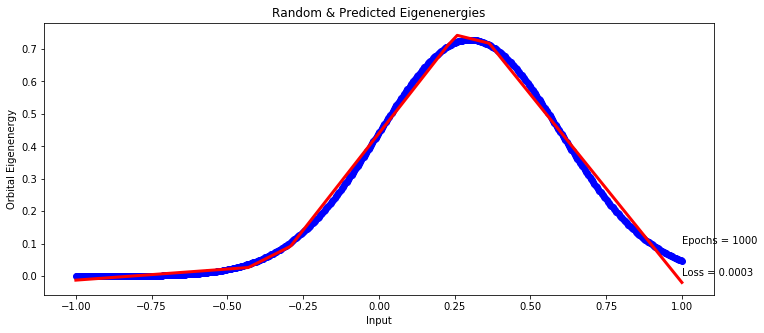

In [77]:
#Plot results!
plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Random & Predicted Eigenenergies')
plt.plot(x.data.numpy(), prediction.data.numpy(), 'red', lw=3)
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())

Text(0.5, 1.0, 'Loss Vs Epochs')

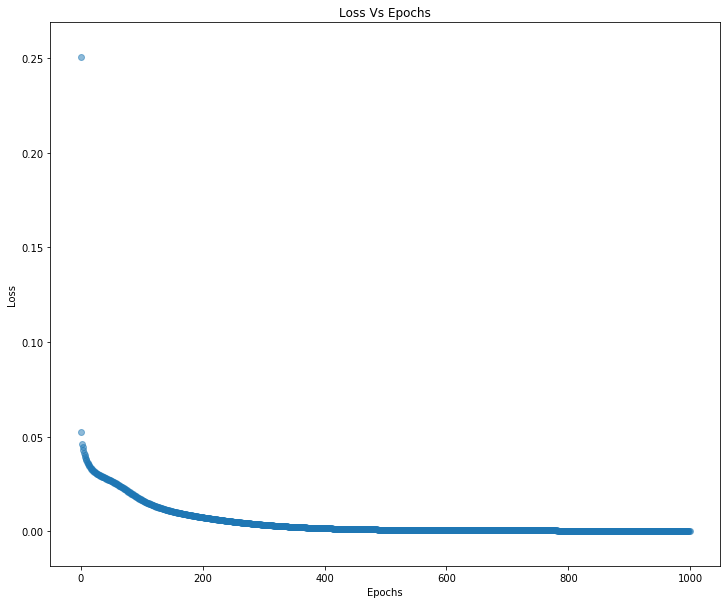

In [50]:
#Loss vs Epochs
e = np.linspace(0, len(arr_loss)-1, len(arr_loss))
plt.figure(figsize=(12,10))
plt.scatter(e,np.array(arr_loss), alpha = 0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

Text(0.5, 1.0, 'Loss Vs Epochs')

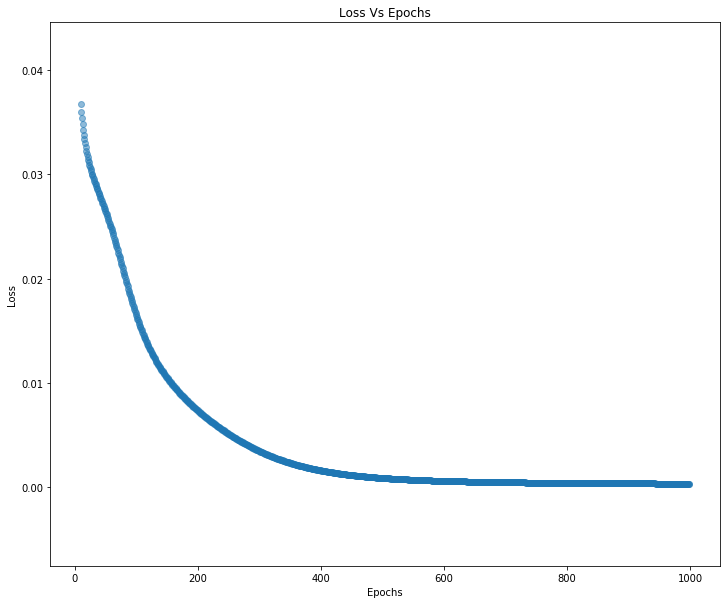

In [53]:
#Because the original graph has outliers, truncate after 1st 10 pts
plt.figure(figsize=(12,10))
plt.scatter(e[10:],np.array(arr_loss)[10:], alpha = 0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
#plt.plot(e,np.array(arr_loss), alpha = 0.5, color='red')

In [55]:
arr_loss_noisy = []
mae_entry = []
#Train the network over the dataset with random noise
for i in range(1,EPOCHS+1):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y_rand_noise)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    arr_loss_noisy.append(loss.data.numpy())
    
    mae_entry.append(MAE(y_rand_noise.data,prediction.data,i))
    
    print('Epoch: ', i, 'Loss = %.4f' % loss.data.numpy(),
         'MAE: ', MAE(y.data,prediction.data,i).numpy())
          #,'MAE: ', MAE(y.data,prediction.data,i))    

Epoch:  1 Loss = 0.0037 MAE:  [0.01000393]
Epoch:  2 Loss = 0.0016 MAE:  [0.06337417]
Epoch:  3 Loss = 0.0012 MAE:  [0.04089424]
Epoch:  4 Loss = 0.0011 MAE:  [0.05147972]
Epoch:  5 Loss = 0.0011 MAE:  [0.04828355]
Epoch:  6 Loss = 0.0011 MAE:  [0.05039247]
Epoch:  7 Loss = 0.0011 MAE:  [0.05012692]
Epoch:  8 Loss = 0.0010 MAE:  [0.05066519]
Epoch:  9 Loss = 0.0010 MAE:  [0.0507575]
Epoch:  10 Loss = 0.0010 MAE:  [0.0509459]
Epoch:  11 Loss = 0.0010 MAE:  [0.05103271]
Epoch:  12 Loss = 0.0010 MAE:  [0.0511166]
Epoch:  13 Loss = 0.0010 MAE:  [0.05116984]
Epoch:  14 Loss = 0.0010 MAE:  [0.05121278]
Epoch:  15 Loss = 0.0010 MAE:  [0.05124349]
Epoch:  16 Loss = 0.0010 MAE:  [0.05126746]
Epoch:  17 Loss = 0.0010 MAE:  [0.05128553]
Epoch:  18 Loss = 0.0010 MAE:  [0.05129976]
Epoch:  19 Loss = 0.0010 MAE:  [0.05131106]
Epoch:  20 Loss = 0.0010 MAE:  [0.05132016]
Epoch:  21 Loss = 0.0010 MAE:  [0.05132774]
Epoch:  22 Loss = 0.0010 MAE:  [0.05133404]
Epoch:  23 Loss = 0.0010 MAE:  [0.05133937]


In [56]:
len(arr_loss_noisy)

1000

Text(0.5, 1.0, 'Loss Vs Epochs')

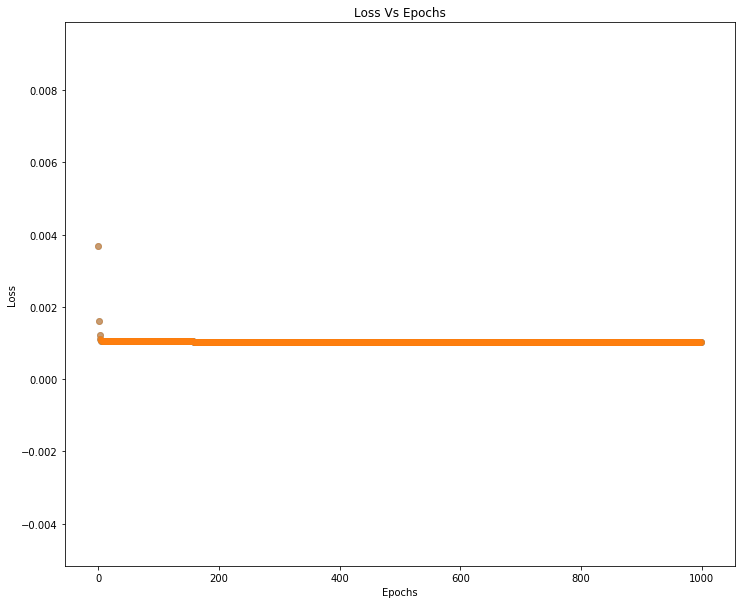

In [57]:
e = np.linspace(0, len(arr_loss_noisy)-1, len(arr_loss_noisy))
plt.figure(figsize=(12,10))
plt.scatter(e,np.array(arr_loss_noisy), alpha = 0.5)
#plt.scatter(e,np.array(arr_loss_noisy), alpha = 0.5)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

### For some reason the above loss function drops to 0.0010 from 0.0037 after the first 7 epochs. Probably due to the noise introduced! Zooming into the first 7 epochs,

Text(0.5, 1.0, 'Loss Vs Epochs')

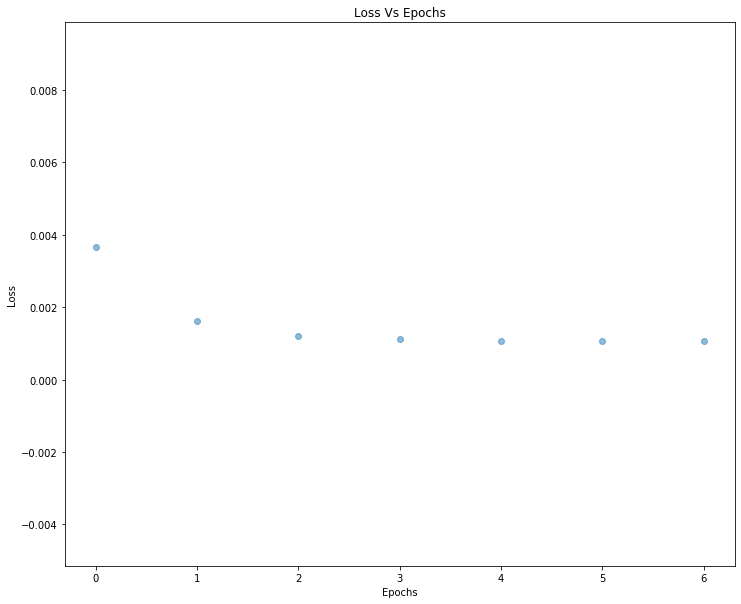

In [59]:
plt.figure(figsize=(12,10))
plt.scatter(e[:7],np.array(arr_loss_noisy)[:7], alpha = 0.5)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

In [60]:
Z = np.linspace(0,499,500)

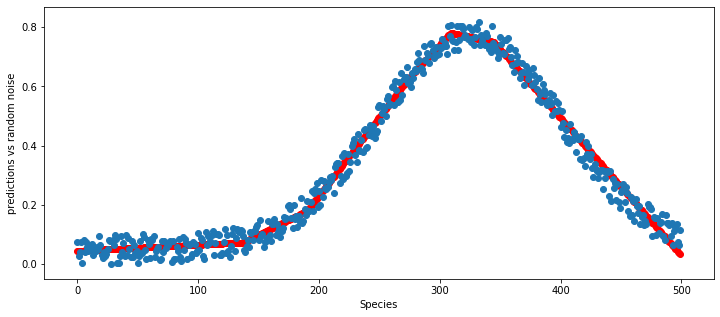

In [62]:
#Plot of 500 datapoints along Gauss like path

plt.figure(figsize=(12,5))
plt.scatter(Z,prediction.data, color='red')
plt.xlabel('Species')
plt.ylabel('predictions vs random noise')
plt.scatter(Z,y_rand_noise.data)

### The above red is a scatterplot of the predicted output Gaussian; the blue is our (x, y_rand_noise) scatterplot around it.